# dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize 
import matplotlib as mpl
from matplotlib.pyplot import plot
import scipy
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import neattext as nt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# import data

In [2]:
df=pd.read_csv('primary-plutchik-wheel-DFE.csv')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,emotion,emotion:confidence,emotion_gold,id,idiom_id,sentence
0,731671736,False,finalized,5,6/8/15 16:10,Neutral,0.3333,NaN,1,1,How much of the forecast was genuine and how m...
1,731671737,False,finalized,5,6/12/15 14:33,Neutral,0.3885,NaN,2,2,I did touch them one time you see but of cours...
2,731671738,False,finalized,5,6/8/15 16:10,Neutral,0.3333,NaN,3,3,We find that choice theorists admit that they ...
3,731671739,False,finalized,5,6/8/15 16:30,Neutral,0.3690,NaN,4,4,"Well, here I am with an olive branch."
4,731671740,False,finalized,5,6/8/15 16:30,Neutral,0.5572,NaN,5,5,"Its rudder and fin were both knocked out, and ..."


# Analysing the data

In [3]:
df.shape


(2524, 11)

In [4]:
df.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at       24
emotion                  0
emotion:confidence       0
emotion_gold          2470
id                       0
idiom_id                 0
sentence                 0
dtype: int64

In [5]:
df.dtypes

_unit_id                int64
_golden                  bool
_unit_state            object
_trusted_judgments      int64
_last_judgment_at      object
emotion                object
emotion:confidence    float64
emotion_gold           object
id                      int64
idiom_id                int64
sentence               object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _unit_id            2524 non-null   int64  
 1   _golden             2524 non-null   bool   
 2   _unit_state         2524 non-null   object 
 3   _trusted_judgments  2524 non-null   int64  
 4   _last_judgment_at   2500 non-null   object 
 5   emotion             2524 non-null   object 
 6   emotion:confidence  2524 non-null   float64
 7   emotion_gold        54 non-null     object 
 8   id                  2524 non-null   int64  
 9   idiom_id            2524 non-null   int64  
 10  sentence            2524 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 199.8+ KB


<AxesSubplot:>

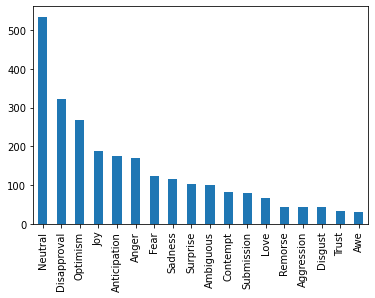

In [7]:
df['emotion'].value_counts().plot(kind='bar')

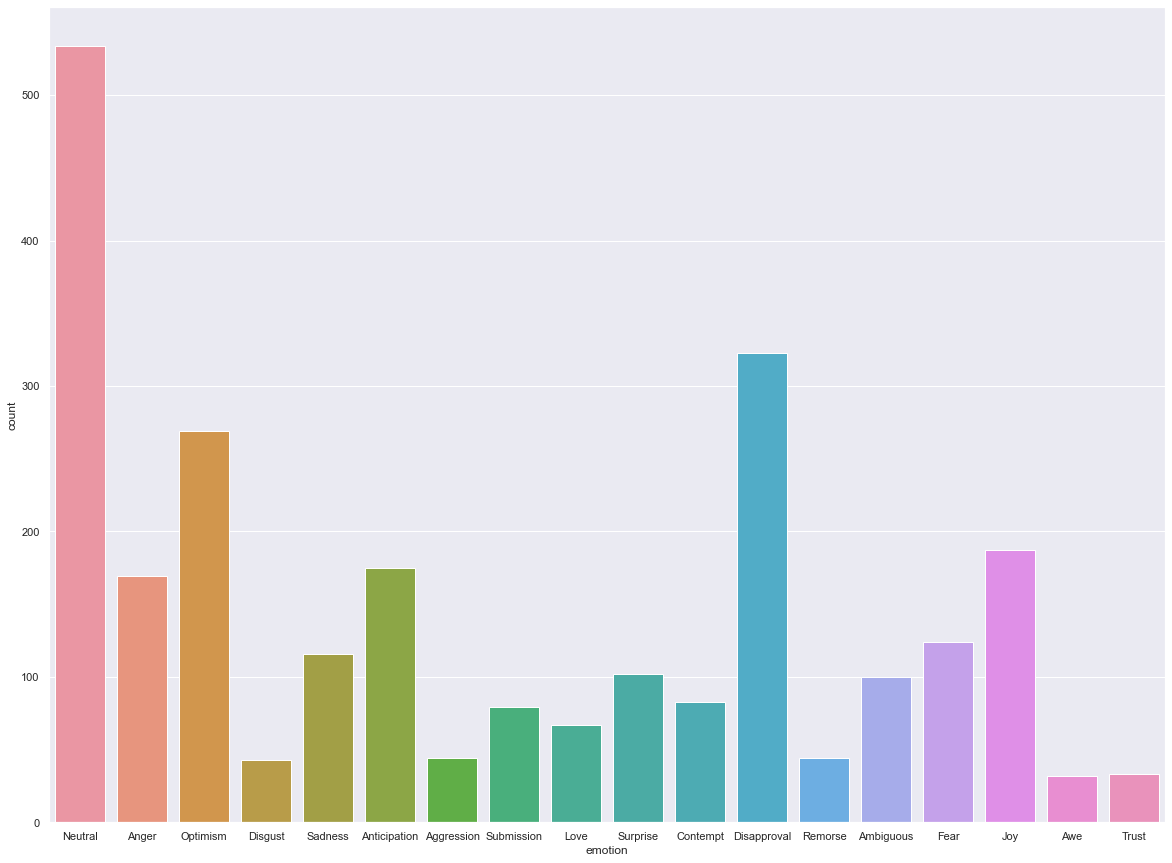

In [9]:
sns.countplot(x='emotion',data=df)
sns.set(rc = {'figure.figsize':(20,12)})

# Creating new dataframe with sentence and emotion

In [9]:
new_df=df[["sentence","emotion"]]

In [10]:
new_df.head()


,sentence,emotion
0,How much of the forecast was genuine and how m...,Neutral
1,I did touch them one time you see but of cours...,Neutral
2,We find that choice theorists admit that they ...,Neutral
3,"Well, here I am with an olive branch.",Neutral
4,"Its rudder and fin were both knocked out, and ...",Neutral


# removing neutral

In [11]:
new_df = new_df[new_df['emotion'] != 'Neutral']

In [12]:
new_df.head()

,sentence,emotion
5,Over my dead body are you arresting him.,Anger
8,Aggie finally found the cat a good home and fr...,Optimism
10,You must sink your differences.,Optimism
11,"Brian, as ever, decided not to sit on the fence.",Disgust
13,"So, you know, whilst I'm a little bit reluctan...",Sadness


In [13]:
new_df['emotion'].value_counts()

Disapproval     323
Optimism        269
Joy             187
Anticipation    175
Anger           169
Fear            124
Sadness         116
Surprise        102
Ambiguous       100
Contempt         83
Submission       79
Love             67
Remorse          44
Aggression       44
Disgust          43
Trust            33
Awe              32
Name: emotion, dtype: int64

# neattext

In [14]:
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [15]:
from neattext.functions import clean_text

In [16]:
new_df['Clean_Sentence'] = new_df['sentence'].apply(nt.remove_userhandles)
new_df['Clean_Sentence'] = new_df['sentence'].apply(nt.remove_stopwords)

In [17]:
new_df.head()

,sentence,emotion,Clean_Sentence
5,Over my dead body are you arresting him.,Anger,dead body arresting him.
8,Aggie finally found the cat a good home and fr...,Optimism,Aggie finally found cat good home day onwards ...
10,You must sink your differences.,Optimism,sink differences.
11,"Brian, as ever, decided not to sit on the fence.",Disgust,"Brian, ever, decided sit fence."
13,"So, you know, whilst I'm a little bit reluctan...",Sadness,"So, know, whilst I'm little bit reluctant, way..."


# Train and test split

In [18]:
Y=new_df["emotion"]

In [19]:
X=new_df["Clean_Sentence"]

In [20]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state=0)

# pipeline

In [21]:
pipe=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])


In [22]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
pipe

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

# Testing the number of classes in dataframe

In [24]:
pipe.classes_

array(['Aggression', 'Ambiguous', 'Anger', 'Anticipation', 'Awe',
       'Contempt', 'Disapproval', 'Disgust', 'Fear', 'Joy', 'Love',
       'Optimism', 'Remorse', 'Sadness', 'Submission', 'Surprise',
       'Trust'], dtype=object)

# Prediction

In [25]:
test1="He was scared to death"
pipe.predict([test1])

array(['Fear'], dtype=object)

In [26]:
test2="His dark eyes reflected the disapproval in his tone."
pipe.predict([test2])

array(['Disapproval'], dtype=object)

In [27]:
test3="He felt heartbroken"
pipe.predict([test3])

array(['Anger'], dtype=object)

In [28]:
pipe.predict_proba([test1])

array([[0.00785952, 0.01311938, 0.02770181, 0.03084286, 0.0493065 ,
        0.02639975, 0.03627486, 0.00989883, 0.49923862, 0.04277476,
        0.0244743 , 0.03617349, 0.02781338, 0.07714793, 0.03703844,
        0.03959443, 0.01434114]])

In [29]:
pipe.predict_proba([test2])

array([[0.01203088, 0.17632212, 0.05900027, 0.04708921, 0.01062481,
        0.0234743 , 0.22489526, 0.01601902, 0.06671305, 0.0472061 ,
        0.02461392, 0.11592485, 0.01512402, 0.02625049, 0.02843313,
        0.08358711, 0.02269146]])

In [30]:
pipe.predict_proba([test3])

array([[0.01445595, 0.02927486, 0.12765267, 0.04045831, 0.03758526,
        0.03434481, 0.07998742, 0.03922265, 0.08022423, 0.06988274,
        0.04684614, 0.08991572, 0.04080163, 0.12700318, 0.03498493,
        0.06661131, 0.04074818]])

# Accuracy

In [31]:
print(pipe.score(X_train,Y_train))

0.9419318816303741


In [32]:
print(pipe.score(X_test,Y_test))

0.33668341708542715
